<a href="https://colab.research.google.com/github/ilyas29akhmetov/lab/blob/main/Grafik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Система уравнений

In [18]:
import numpy as np
from scipy.optimize import fsolve
def f(p):
  x,y=p
  return(x**2+y*x-10,x*y+y**2+np.sin(x)+7)
x,y= fsolve(f,(1,3))
print(x,y)

5.031943969582944 -3.04464044227471


Функция coolprop

In [19]:
pip install CoolProp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 35.0 MB/s eta 0:00:00


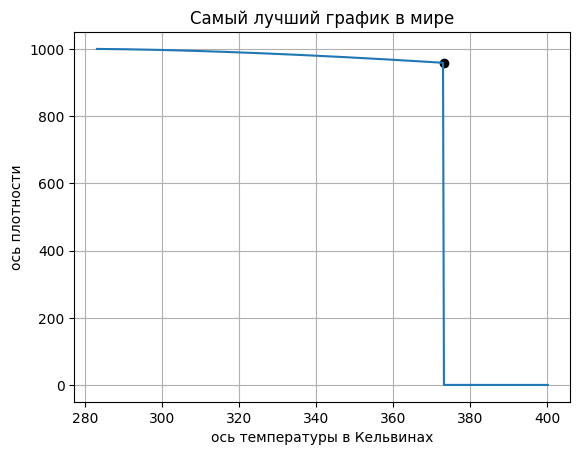

In [29]:
import CoolProp.CoolProp as ct 
import matplotlib.pyplot as plt
t=np.linspace(283.15,400.15,500)
p=101325
d=ct.PropsSI("D","T",t,"P",p,"water")

plt.plot(t,d)
plt.title("Самый лучший график в мире")
plt.xlabel("ось температуры в Кельвинах")
plt.ylabel("ось плотности")
plt.scatter(373.15,957,color="black")
plt.grid()
plt.show()


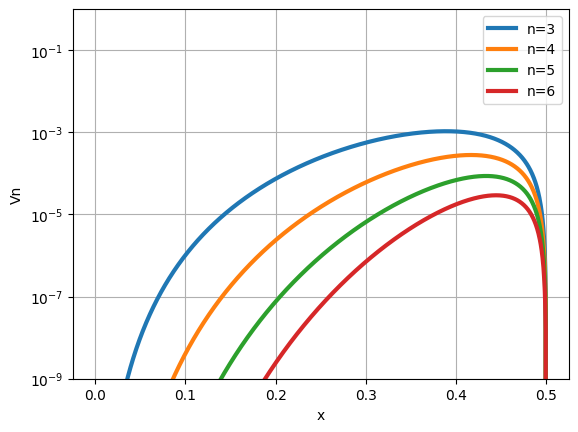

In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp 
a, x, V1 = smp.symbols('a x V1')
smp.init_printing() 
V1 = a**3*(1-2*x)**2*x
V1s = smp.diff(V1, x)
x1 = smp.solve(V1s, x)
x1_ = [xx.evalf(5) for xx in x1]
x1, x1_ 
V11 = [V1.subs(x, xx).subs(a, 1) for xx in x1]
V11_ = [V1.subs(x, xx).subs(a, 1).evalf(5) for xx in x1]
V11, V11_ 
V2 = smp.expand(smp.simplify(V1 + 4 * (a*x)**3 * (1 - 2*x)**2 * x))
V2
V2s = smp.diff(V2, x)
x2 = smp.solve(V2s, x)
x2_ = [xx.evalf(5) for xx in x2]
[V2.subs(x, xx).subs(a,1).evalf(5) for xx in x2_]
V3 = smp.expand(smp.simplify(V2 + 16 * (a*x**2)**3 * (1 -
2*x)**2 * x))
V3s = smp.diff(V3, x)
x3 = smp.solve(V3s, x)
x3_ = [xx.evalf(5) for xx in x3] 
n, Vp, Vn = smp.symbols('n, Vp, Vn')
Vn = 4**(n-2)*(a*x**(n-2))**3*(1-2*x)**2*x 
def vn(x, n, a=1):
 return 4**(n-1)*(a*x**(n-1))**3*(1-2*x)**2*x
m = 1000
xnum = np.linspace(0,.5, m)
styles = 'k-', 'k--', 'k-.', 'k:'
for q in range(3,7):
 plt.plot(xnum, vn(xnum, q), lw=3, label=f'n={q}')
plt.grid()
plt.yscale('log')
plt.ylim(1e-9, 1)
plt.legend(loc='best');
plt.xlabel('x')
plt.ylabel('Vn')
def v(x, n, a=1):
 vv = 0
 for i in range(1, n+1):
  vv = vn(x, i, a=a)
 return vv 